In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pprint
from pandas import DataFrame
from datetime import date, time, timedelta, datetime

from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from altair import *


plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display
from unidecode import unidecode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('../data/interim/entries_per_day_2017_01_29.csv')

In [4]:
weather = pd.read_csv('../data/interim/df_les_gets_unique_dates_20170129.csv')

In [20]:
# restricting weather to only "non-null" columns:
weather = weather[weather.columns[:19]]

In [22]:
weather.date.iloc[0]

'2012-01-01'

In [23]:
df.date.iloc[0]

'2007-01-01'

In [25]:
# merging df and weather into a single dataframe:
df = df.merge(weather, on = 'date')

In [26]:
df.isnull().sum()

date                     0
to_first_day             0
day_of_w                 0
season_month             0
season_year              0
french_holiday_zone_B    0
french_holiday_zone_C    0
french_holiday_zone_A    0
entries                  0
numer_sta                0
resort                   0
haut_sta                 0
rr24                     0
tn24                     0
tx24                     0
t_am                     0
t_pm                     0
dd_am                    0
dd_pm                    0
ff_am                    0
ff_pm                    0
td_am                    0
td_pm                    0
u_am                     0
u_pm                     0
ht_neige_am              0
ssfrai_am                0
dtype: int64

In [31]:
abs(df.corr()['entries']).sort_values(ascending = False)

entries                  1.000000
french_holiday_zone_A    0.504862
french_holiday_zone_B    0.413623
french_holiday_zone_C    0.404687
ht_neige_am              0.370005
tn24                     0.218228
t_am                     0.192927
td_am                    0.166921
tx24                     0.165408
season_month             0.143408
ff_pm                    0.141178
td_pm                    0.117875
dd_am                    0.115860
t_pm                     0.114570
dd_pm                    0.108830
to_first_day             0.104125
rr24                     0.088607
ff_am                    0.043131
u_pm                     0.024193
season_year              0.016890
ssfrai_am                0.016210
day_of_w                 0.013698
u_am                     0.006929
numer_sta                     NaN
haut_sta                      NaN
Name: entries, dtype: float64

In [32]:
df.corr()['entries'].sort_values(ascending = False)

entries                  1.000000
french_holiday_zone_A    0.504862
french_holiday_zone_B    0.413623
french_holiday_zone_C    0.404687
ht_neige_am              0.370005
season_month             0.143408
to_first_day             0.104125
u_am                     0.006929
day_of_w                -0.013698
ssfrai_am               -0.016210
season_year             -0.016890
u_pm                    -0.024193
ff_am                   -0.043131
rr24                    -0.088607
dd_pm                   -0.108830
t_pm                    -0.114570
dd_am                   -0.115860
td_pm                   -0.117875
ff_pm                   -0.141178
tx24                    -0.165408
td_am                   -0.166921
t_am                    -0.192927
tn24                    -0.218228
numer_sta                     NaN
haut_sta                      NaN
Name: entries, dtype: float64

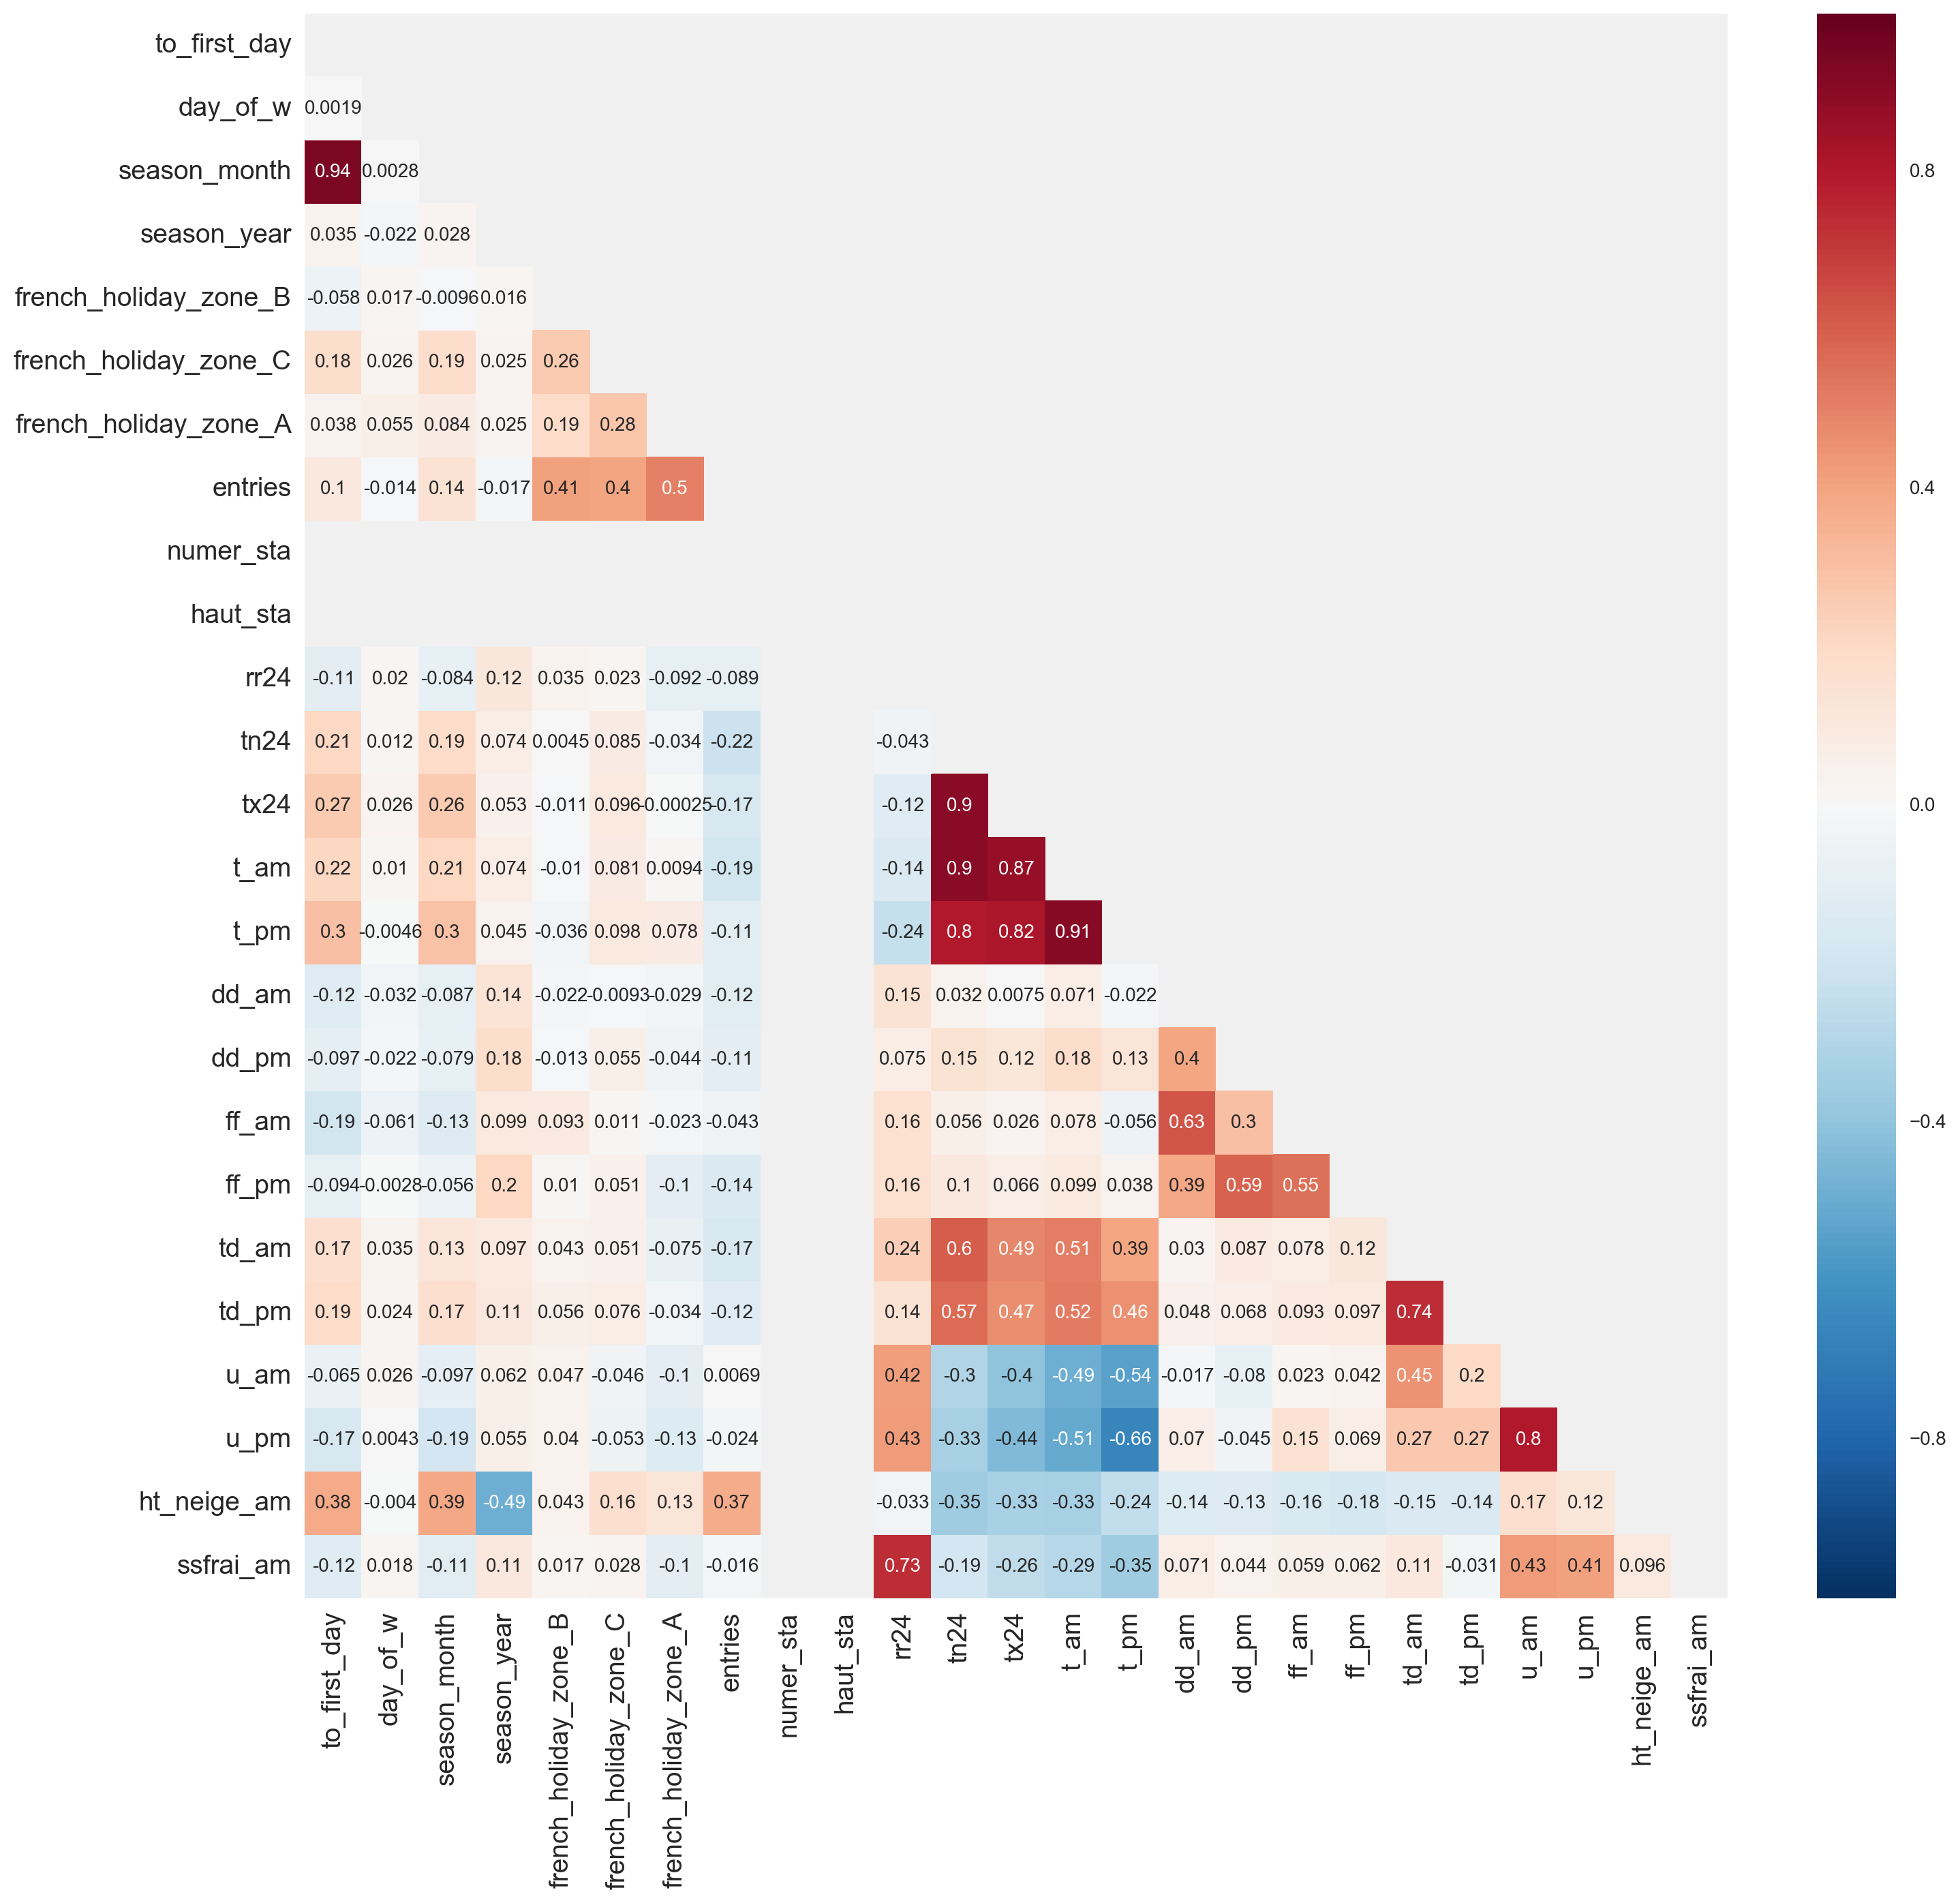

In [38]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(15,15))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(df)

In [40]:
# deleting variables that are highly correlated, and represent the same idea 
# e.g. temperature
# let's keep only tn24 as it is the highest correlated with entries

del df['t_am']
del df['t_pm']
del df['tx24']

In [49]:
# deleting columns that are relative to the ski resort
del df['numer_sta']
del df['haut_sta']
del df['resort']

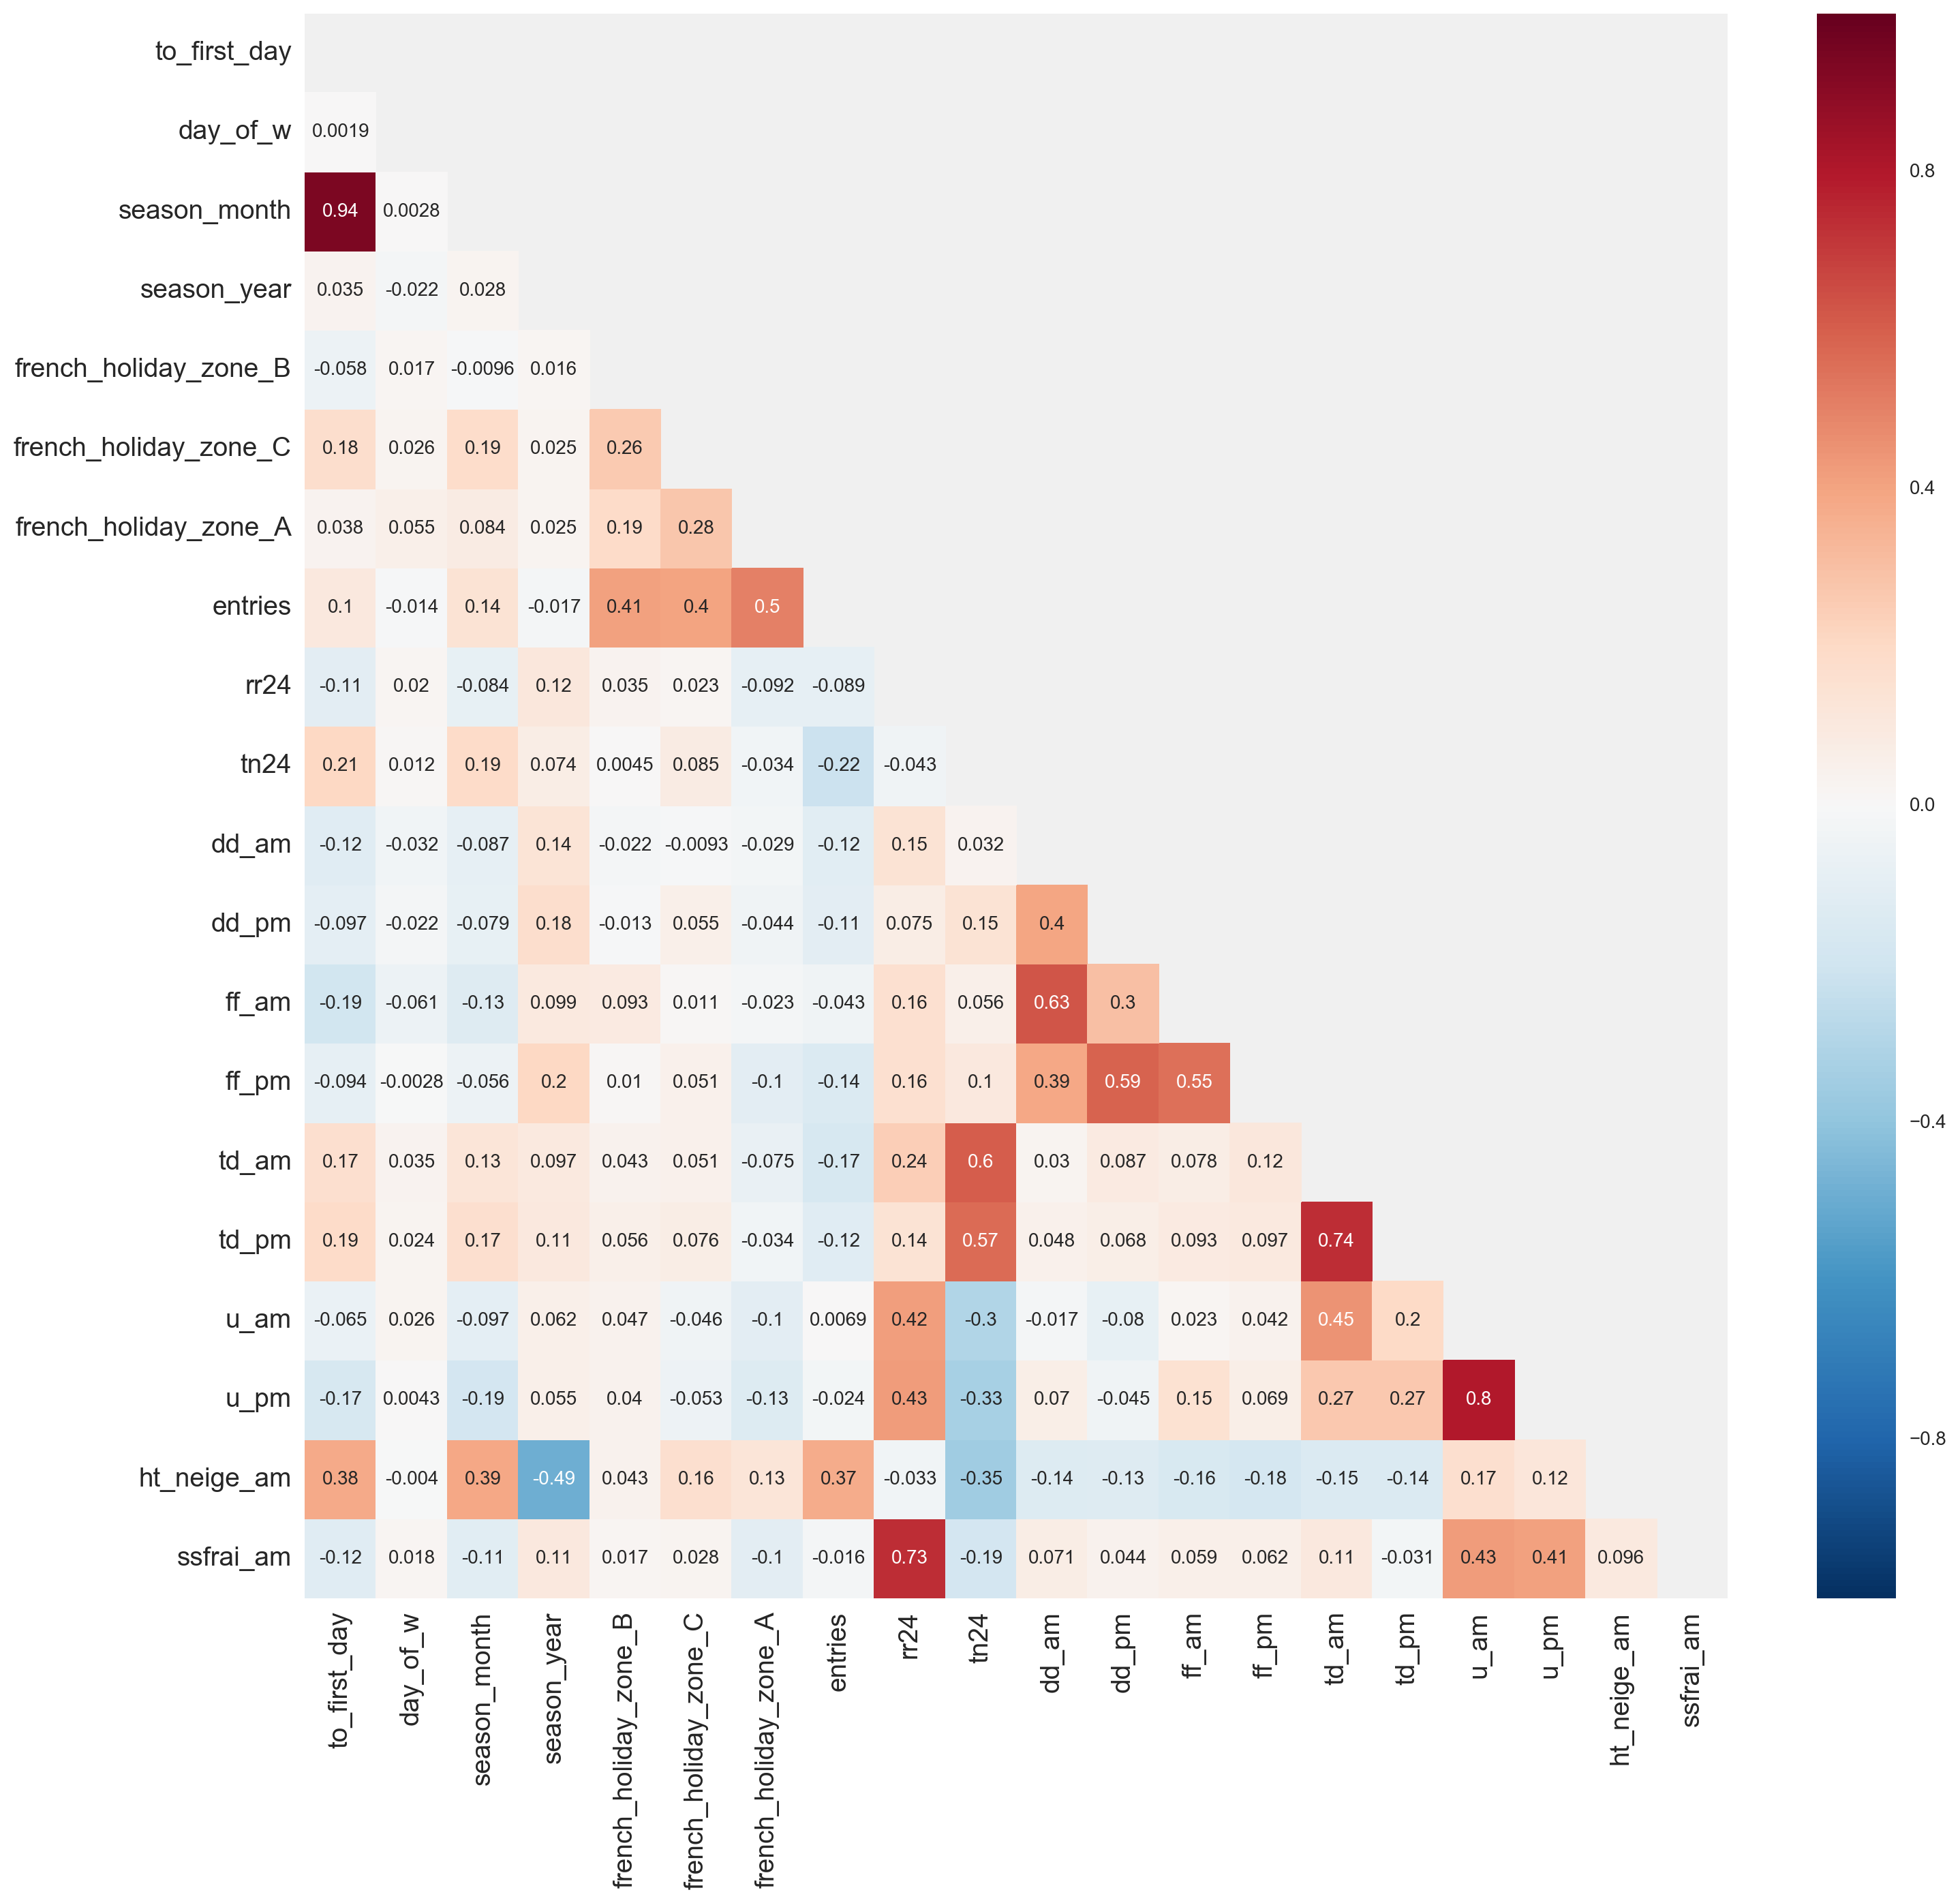

In [50]:
correlation_heat_map(df)

In [53]:
df_cols = df.columns.tolist()
df_cols

['date',
 'to_first_day',
 'day_of_w',
 'season_month',
 'season_year',
 'french_holiday_zone_B',
 'french_holiday_zone_C',
 'french_holiday_zone_A',
 'entries',
 'rr24',
 'tn24',
 'dd_am',
 'dd_pm',
 'ff_am',
 'ff_pm',
 'td_am',
 'td_pm',
 'u_am',
 'u_pm',
 'ht_neige_am',
 'ssfrai_am']

In [56]:
# building a sklearn linear regression predicting entries

predictors = [x for x in df_cols if x not in ['date','entries'] ]

from sklearn.linear_model import LinearRegression

In [60]:
X = df[predictors].values
y = df['entries'].values

In [61]:
linmod = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [72]:
linmod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
linmod.score(X_test, y_test)

0.30002477633872526

In [74]:
predictions = linmod.predict(X_test)

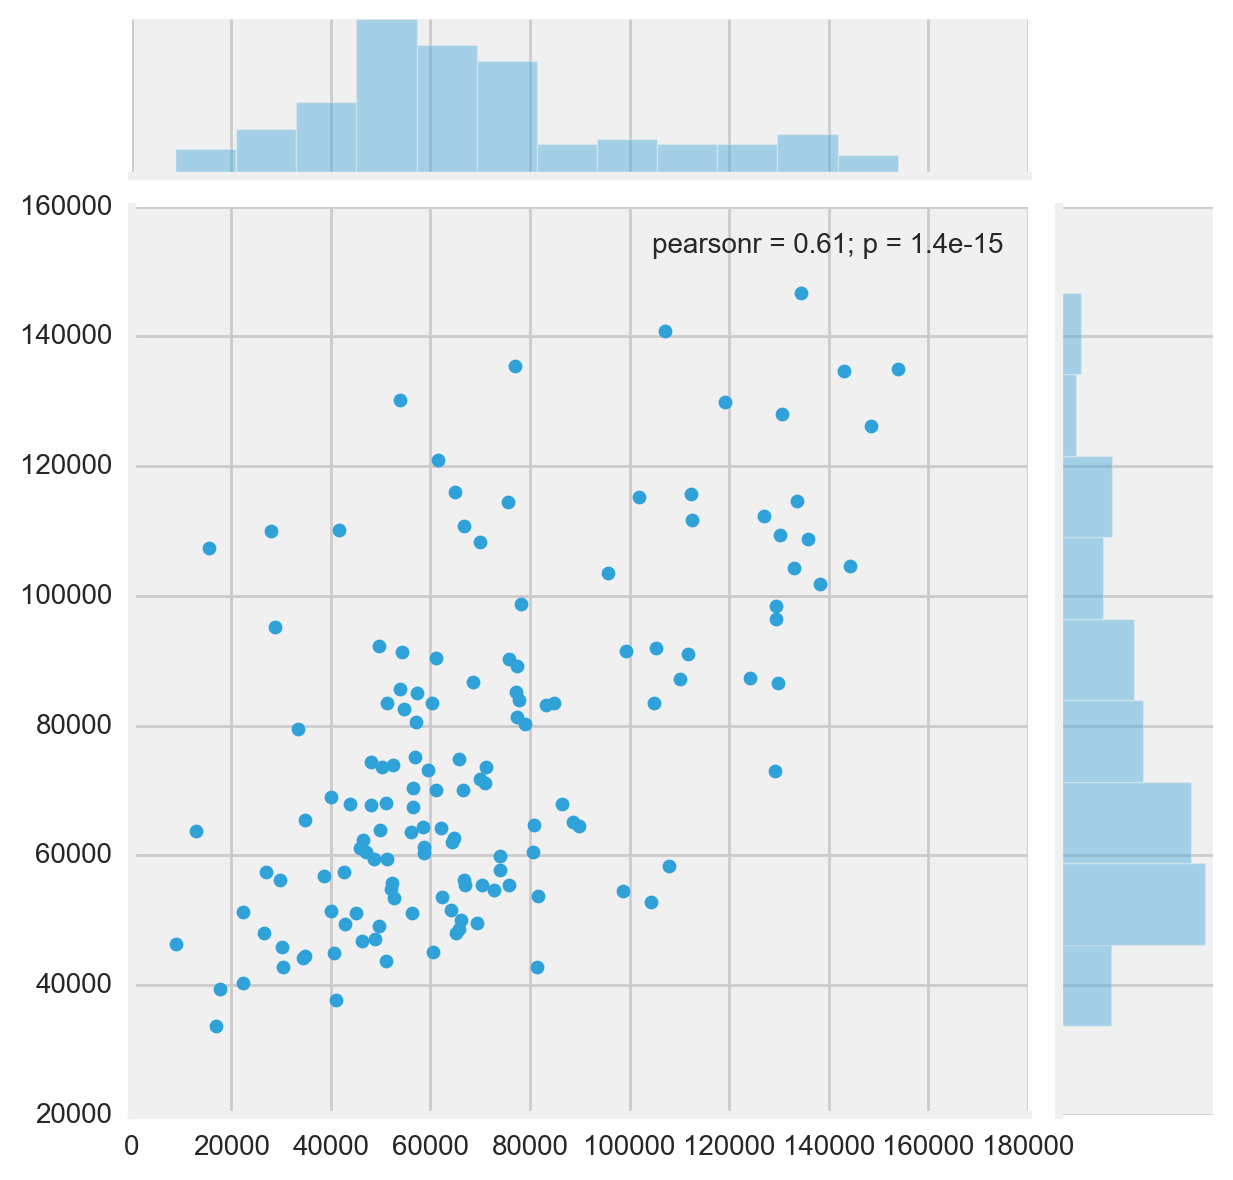

In [75]:
# residuals against the true values
sns.jointplot(y_test, predictions)

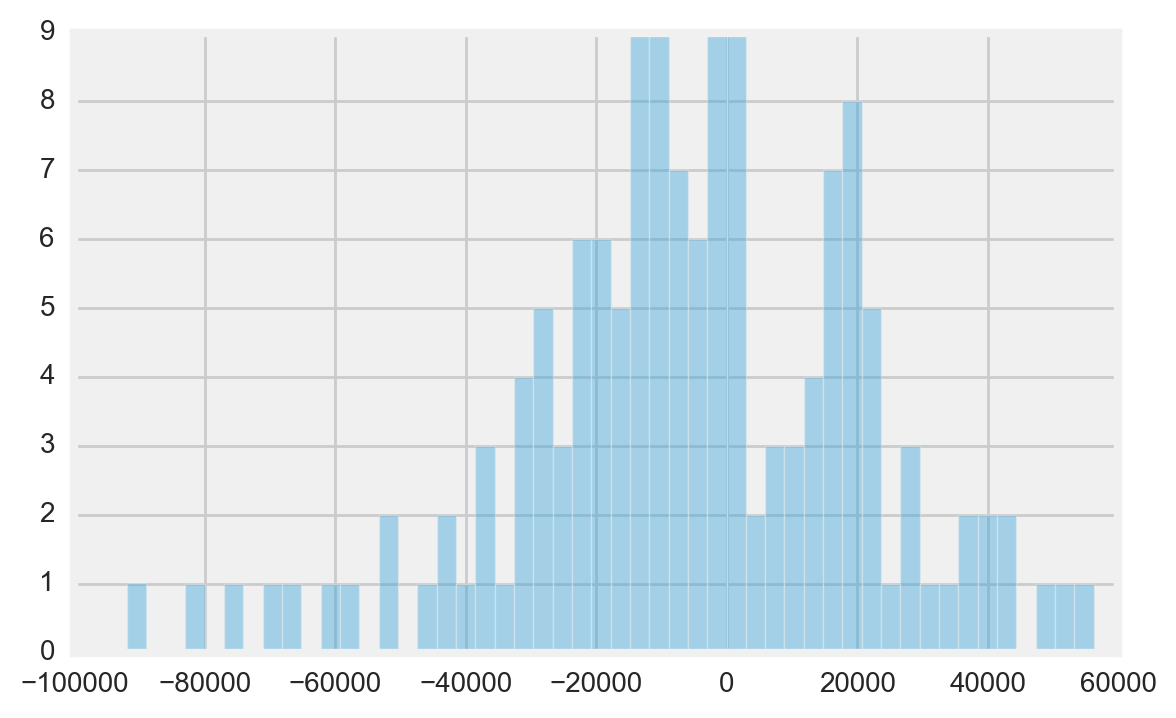

In [76]:
# histogram of the residuals
sns.distplot(y_test-predictions, bins = 50, kde = False)

In [77]:
print 'mean absolute errors = ',np.mean(abs(predictions - y_test))

mean absolute errors =  20979.5502706


In [69]:
# plot to show the strength of the different coefficients
coef_df = pd.DataFrame({
        'predictor': predictors,
        'coef': linmod.coef_
         })

coef_df.sort_values('coef', inplace = True)

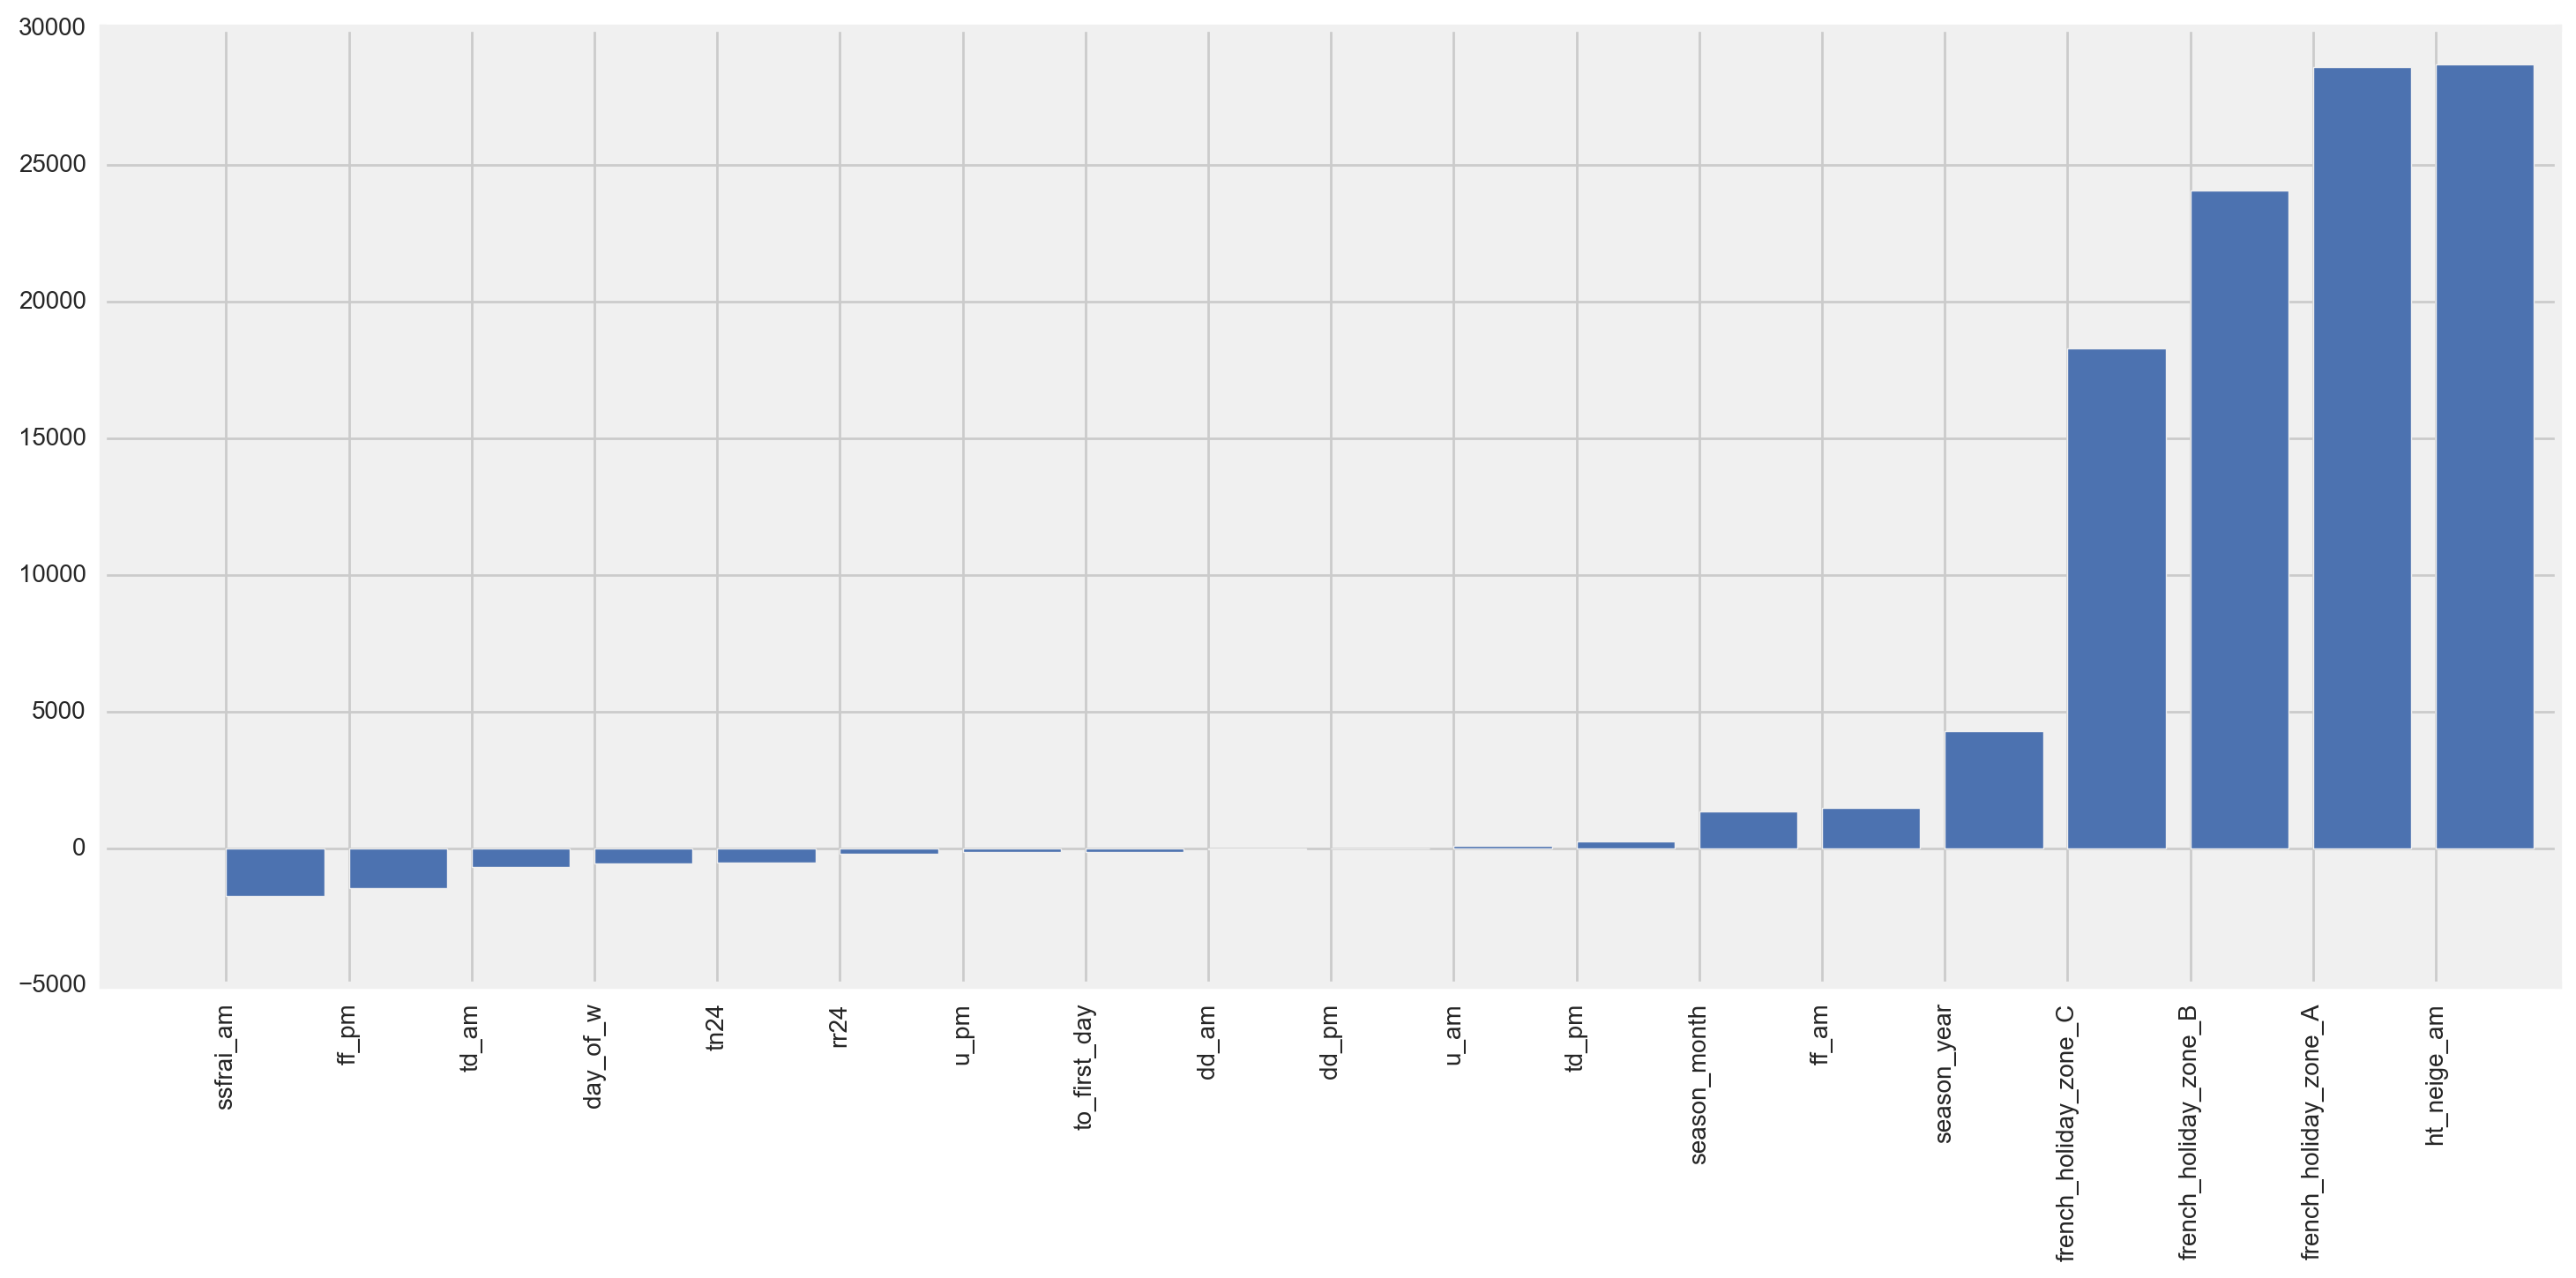

In [70]:
fig, ax = plt.subplots(figsize = (16,7))
ax.bar(range(1,coef_df.shape[0]+1), coef_df.coef, tick_label = coef_df.predictor.values)
ax.set_xticklabels(coef_df.predictor.values, rotation=90)
plt.show()

In [ ]:
# maybe huge differences because they're not on the same scale...?
# -> let's rework the model with 